<a href="https://colab.research.google.com/github/002001/ITB2022/blob/main/ITB_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9D%80%ED%96%89%EA%B0%80%EC%9E%85%EC%9E%90_%EC%9D%B4%ED%83%88%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [127]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/project/churn.csv", index_col=0)

In [128]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [129]:
df.shape

(10000, 13)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


credit store

geography

gender

age

Tenure 재임기간

balance 잔액

NumOfProducts 은행 상품 구매 (ex 적금)

HasCrCard 신용카드 여부

IsActiveMember

EstimatedSalary 예상 급여

exited 종속변수

In [131]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


# 2. EDA

In [132]:
# categorical Variables 범주형 변수
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [133]:
# Numeric Variables 수치형 변수
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

## Exited (종속변수)

In [134]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [135]:
churn = df.loc[df["Exited"]==1]

In [136]:
churn = df.loc[df["Exited"]==1]
not_churn = df.loc[df["Exited"]==0]

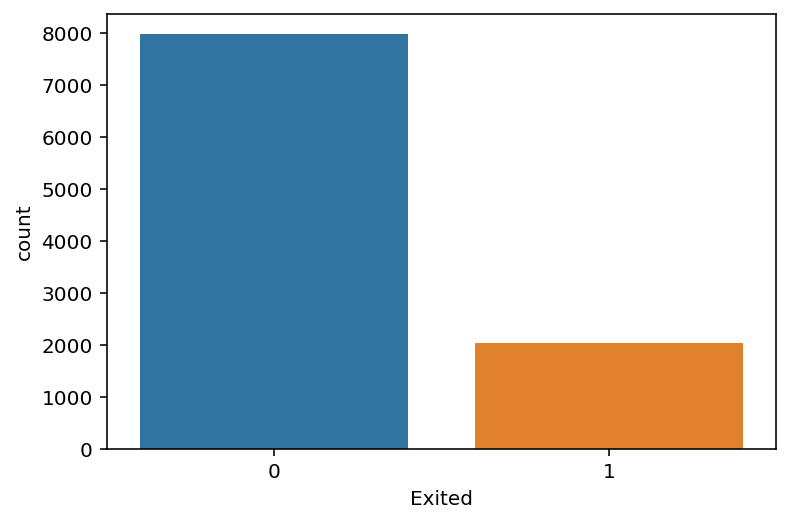

In [137]:
sns.countplot(df["Exited"])
plt.show()

##Categorical Variables (범주형 변수)

### Tenure

In [138]:
not_churn["Tenure"].value_counts().sort_values()

0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: Tenure, dtype: int64

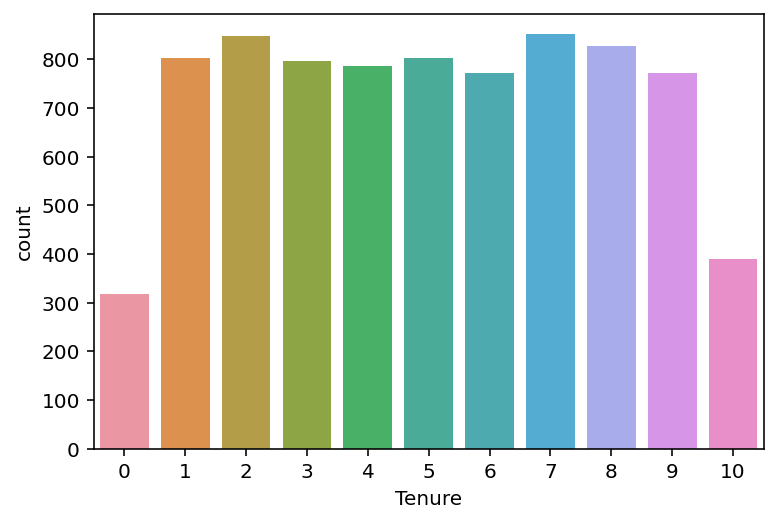

In [139]:
sns.countplot(not_churn["Tenure"])
plt.show()

In [140]:
churn["Tenure"].value_counts().sort_values()

0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: Tenure, dtype: int64

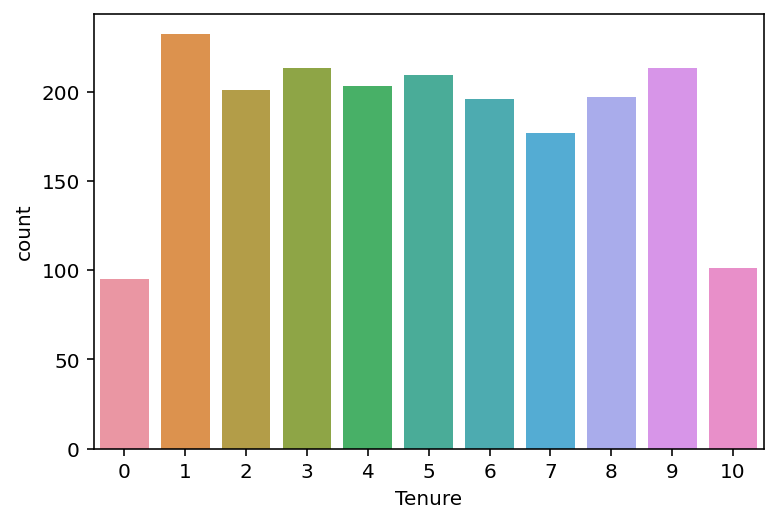

In [141]:
sns.countplot(churn["Tenure"])
plt.show()

예상대로 5년 미만이 가장 이탈률이 높음 그러나 9년이 213명(2등)인 것은 의외

### NumOfProducts

In [142]:
not_churn["NumOfProducts"].value_counts().sort_values()

3      46
1    3675
2    4242
Name: NumOfProducts, dtype: int64

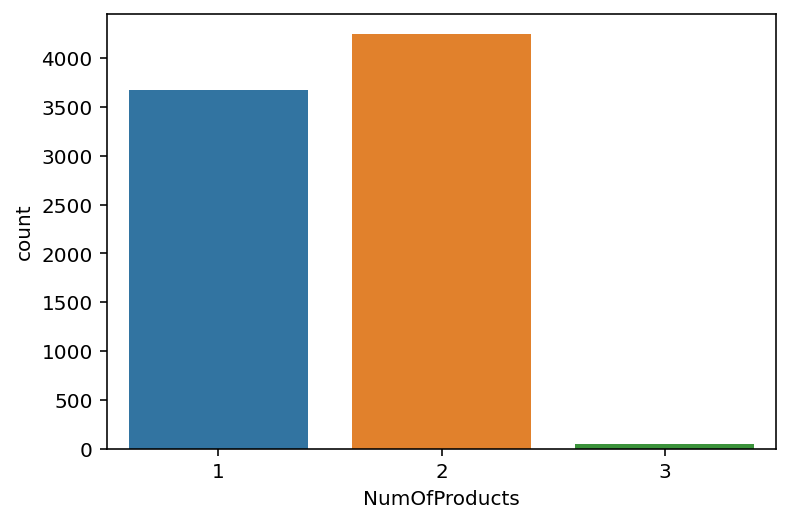

In [143]:
sns.countplot(not_churn["NumOfProducts"])
plt.show()

In [144]:
churn["NumOfProducts"].value_counts().sort_values()

4      60
3     220
2     348
1    1409
Name: NumOfProducts, dtype: int64

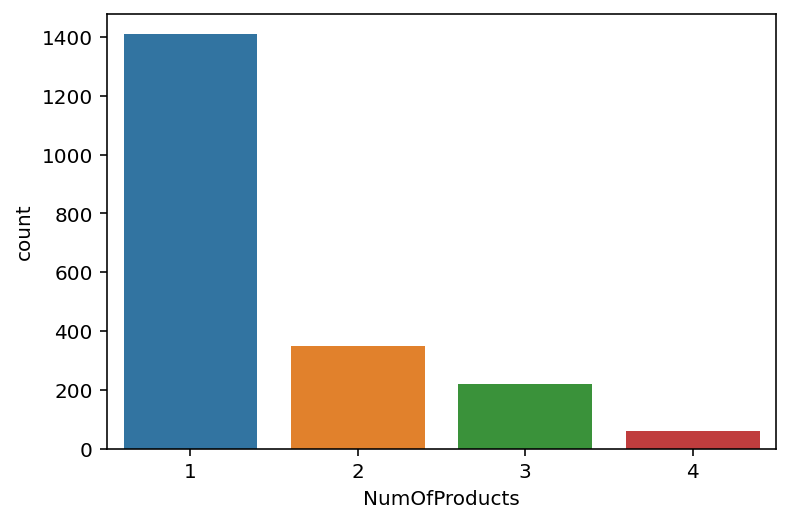

In [145]:
sns.countplot(churn["NumOfProducts"])
plt.show()

###HasCrCard

In [146]:
not_churn["HasCrCard"].value_counts()

1    5631
0    2332
Name: HasCrCard, dtype: int64

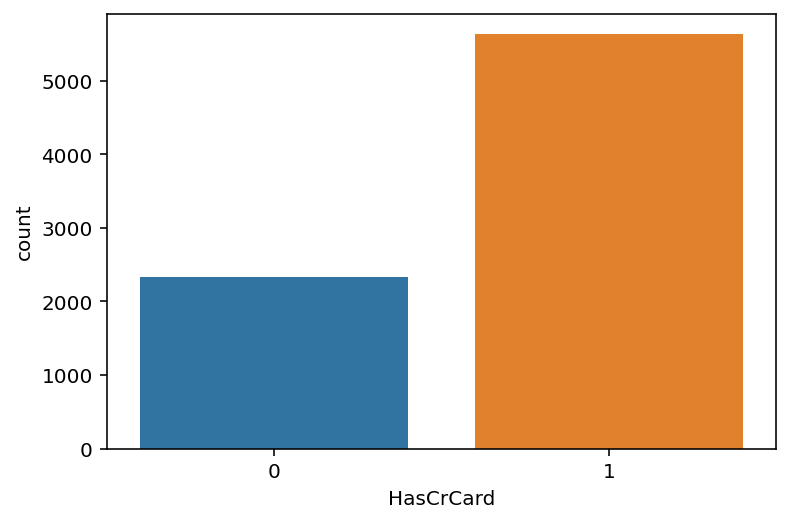

In [147]:
sns.countplot(not_churn["HasCrCard"])
plt.show()

In [148]:
churn["HasCrCard"].value_counts()

1    1424
0     613
Name: HasCrCard, dtype: int64

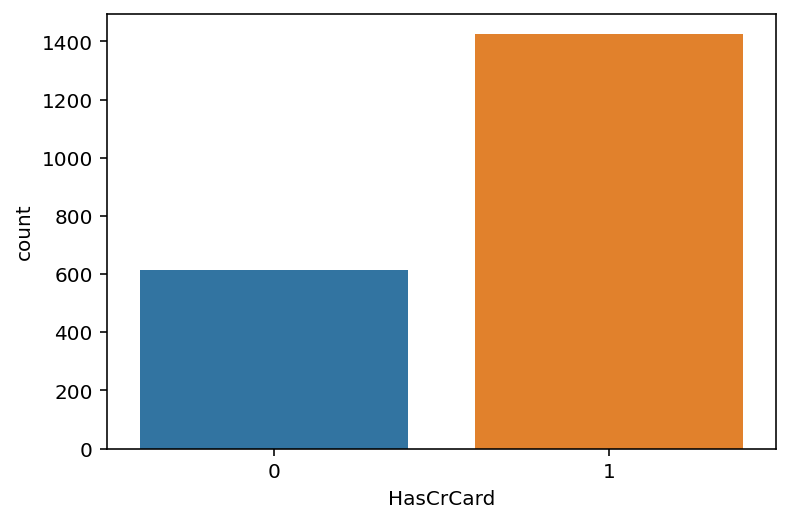

In [149]:
sns.countplot(churn["HasCrCard"])
plt.show()

###IsActiveMember

In [150]:
not_churn["IsActiveMember"].value_counts()

1    4416
0    3547
Name: IsActiveMember, dtype: int64

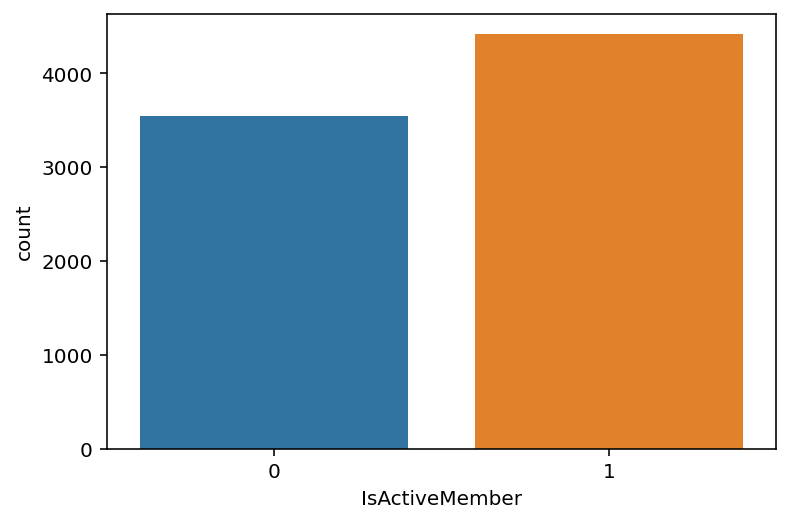

In [151]:
sns.countplot(not_churn["IsActiveMember"])
plt.show()

In [152]:
churn["IsActiveMember"].value_counts()

0    1302
1     735
Name: IsActiveMember, dtype: int64

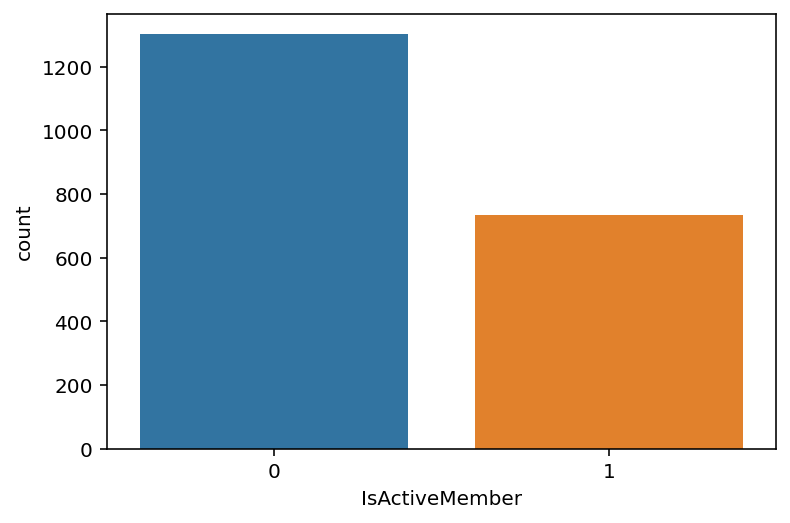

In [153]:
sns.countplot(churn["IsActiveMember"])
plt.show()

###Geography

In [154]:
not_churn.Geography.value_counts().sort_values()

Germany    1695
Spain      2064
France     4204
Name: Geography, dtype: int64

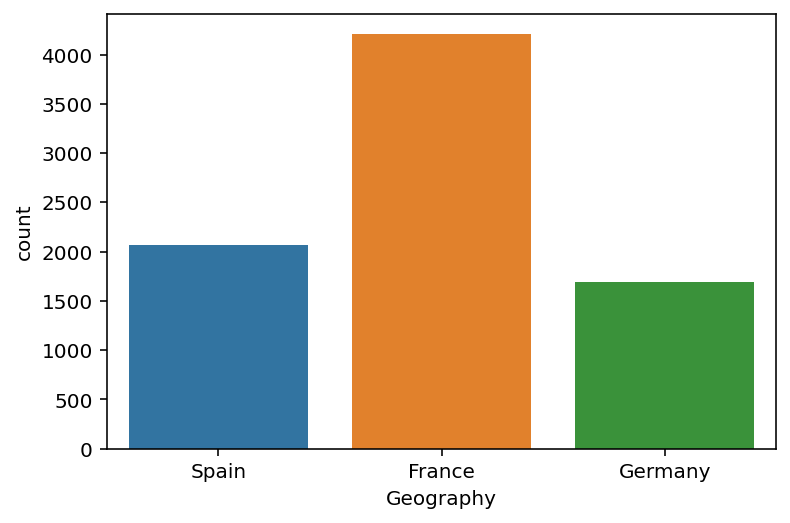

In [155]:
sns.countplot(not_churn.Geography)
plt.show()

In [156]:
churn.Geography.value_counts().sort_values()

Spain      413
France     810
Germany    814
Name: Geography, dtype: int64

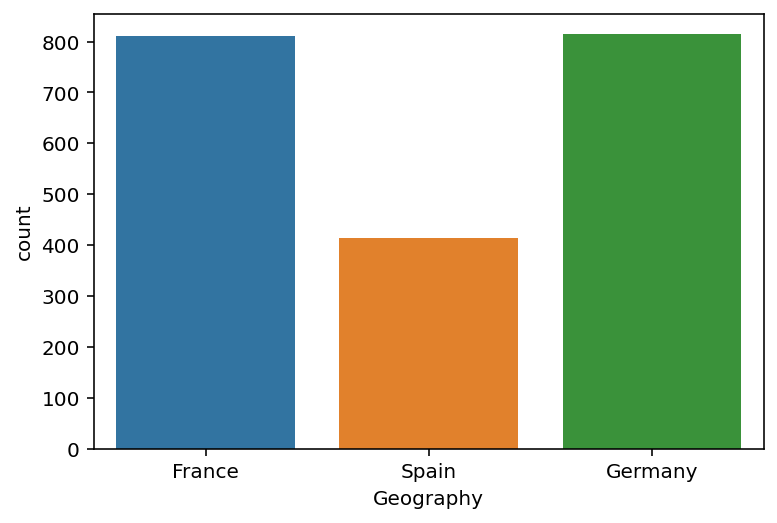

In [157]:
sns.countplot(churn.Geography)
plt.show()

독일이 가장 이탈률이 높음.

###Gender

In [158]:
not_churn.Gender.value_counts()

Male      4559
Female    3404
Name: Gender, dtype: int64

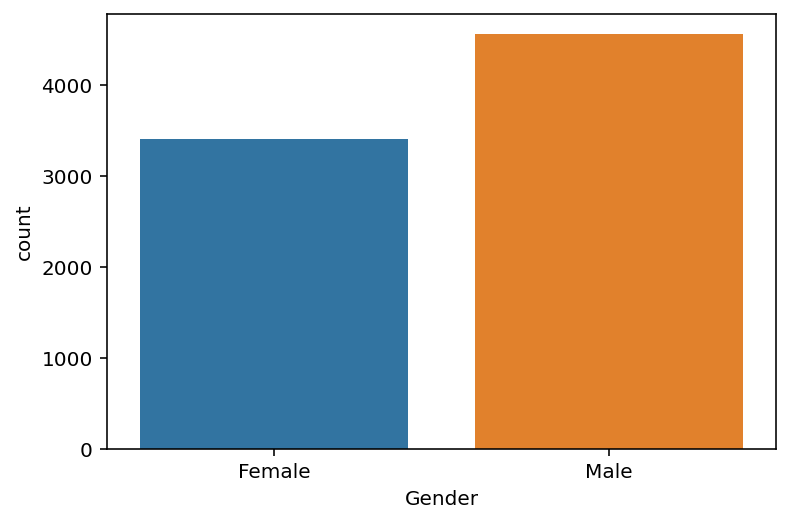

In [159]:
sns.countplot(not_churn.Gender)
plt.show()

In [160]:
churn.Gender.value_counts()

Female    1139
Male       898
Name: Gender, dtype: int64

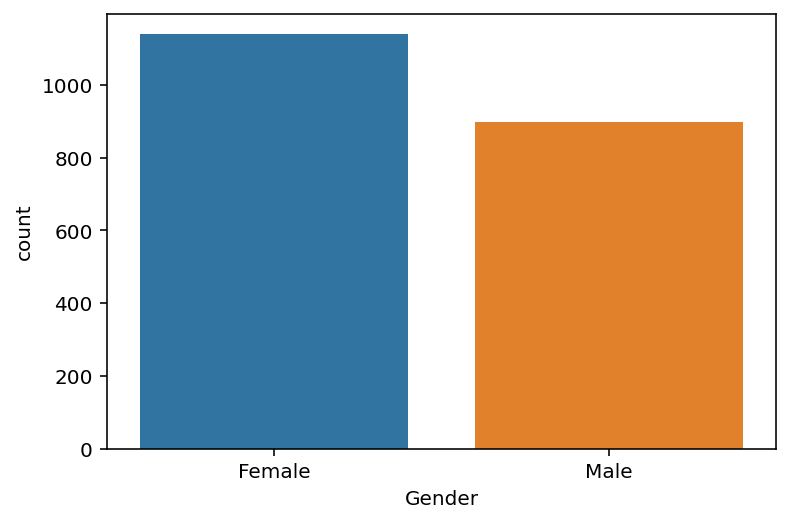

In [161]:
sns.countplot(churn.Gender)
plt.show()

남성 이탈률: 16.4%
여성 이탈률: 25 %

##Numerical Variables (수치형 변수)

###CreditScore

In [162]:
not_churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
5%        492.000000
25%       585.000000
50%       653.000000
75%       718.000000
90%       778.000000
95%       812.000000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

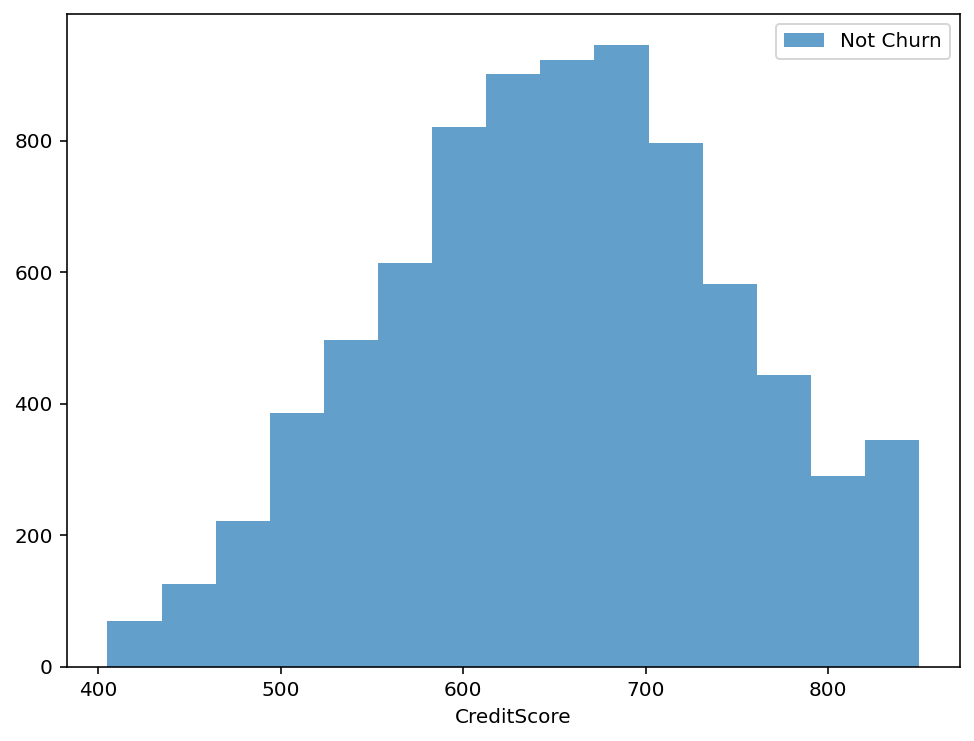

In [163]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(not_churn["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [164]:
churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
5%        479.000000
25%       578.000000
50%       646.000000
75%       716.000000
90%       776.400000
95%       812.200000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

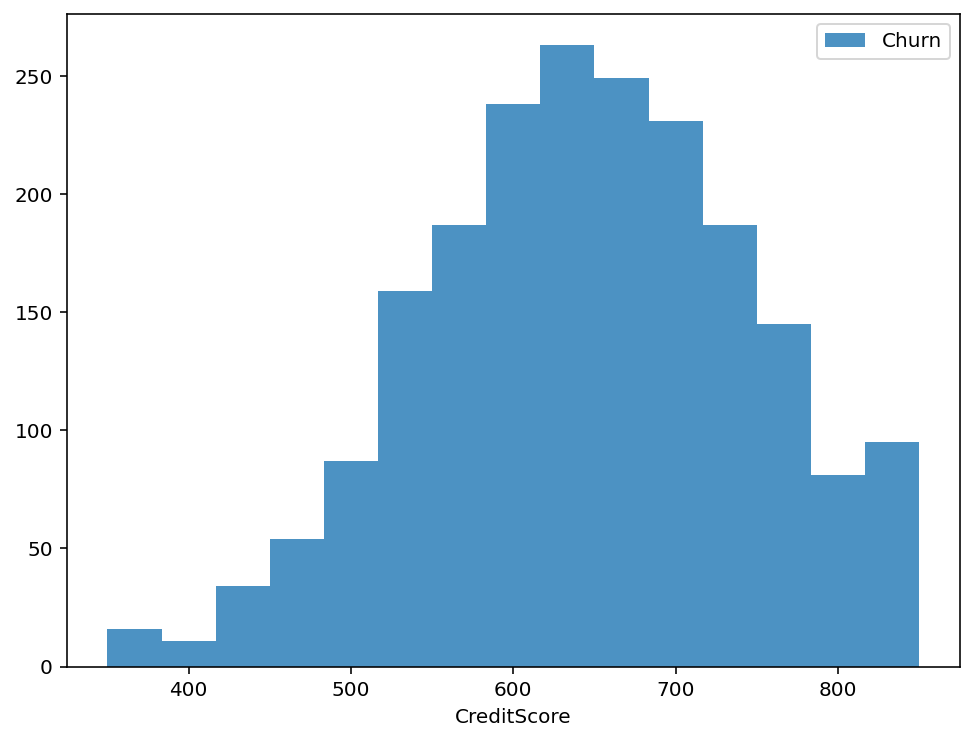

In [165]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(churn["CreditScore"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

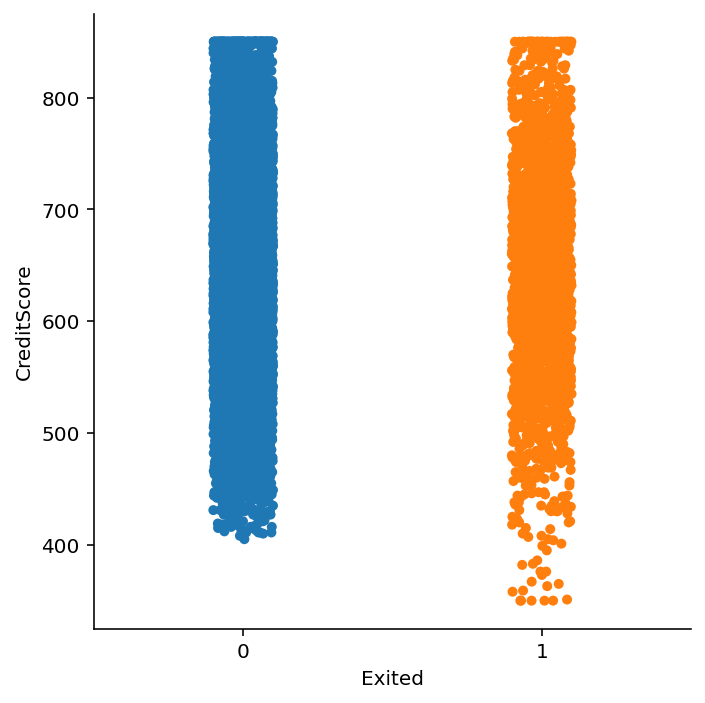

In [166]:
sns.catplot("Exited", "CreditScore", data = df)

###Age

In [167]:
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
5%         24.000000
25%        31.000000
50%        36.000000
75%        41.000000
90%        49.000000
95%        59.000000
99%        73.000000
max        92.000000
Name: Age, dtype: float64

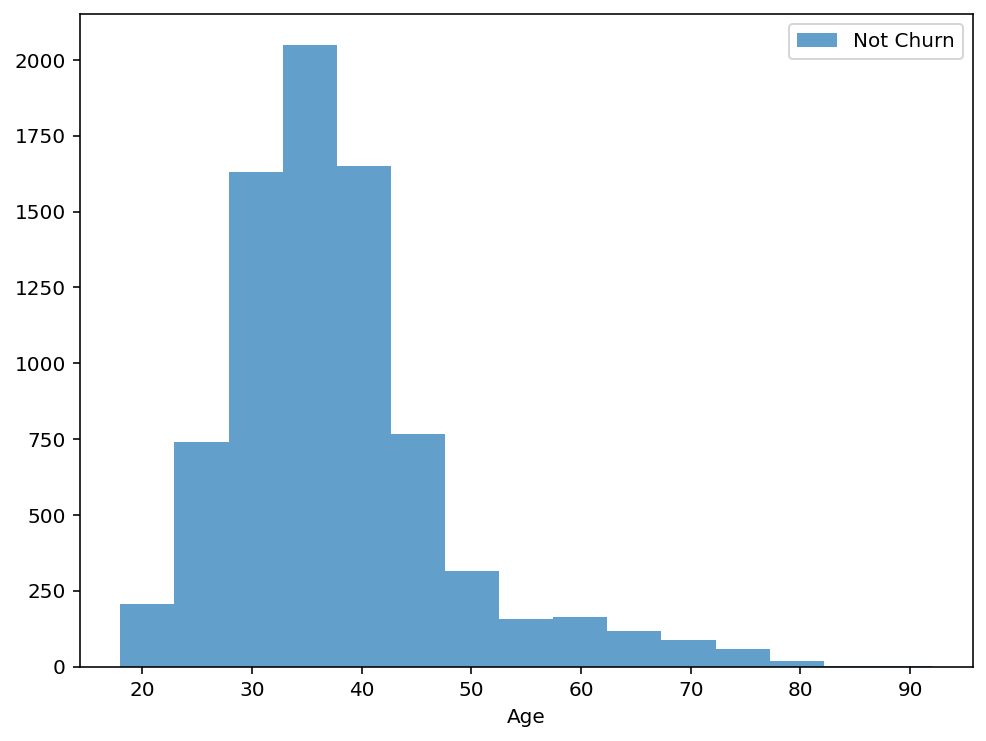

In [168]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [169]:
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
5%         29.000000
25%        38.000000
50%        45.000000
75%        51.000000
90%        58.000000
95%        61.000000
99%        68.000000
max        84.000000
Name: Age, dtype: float64

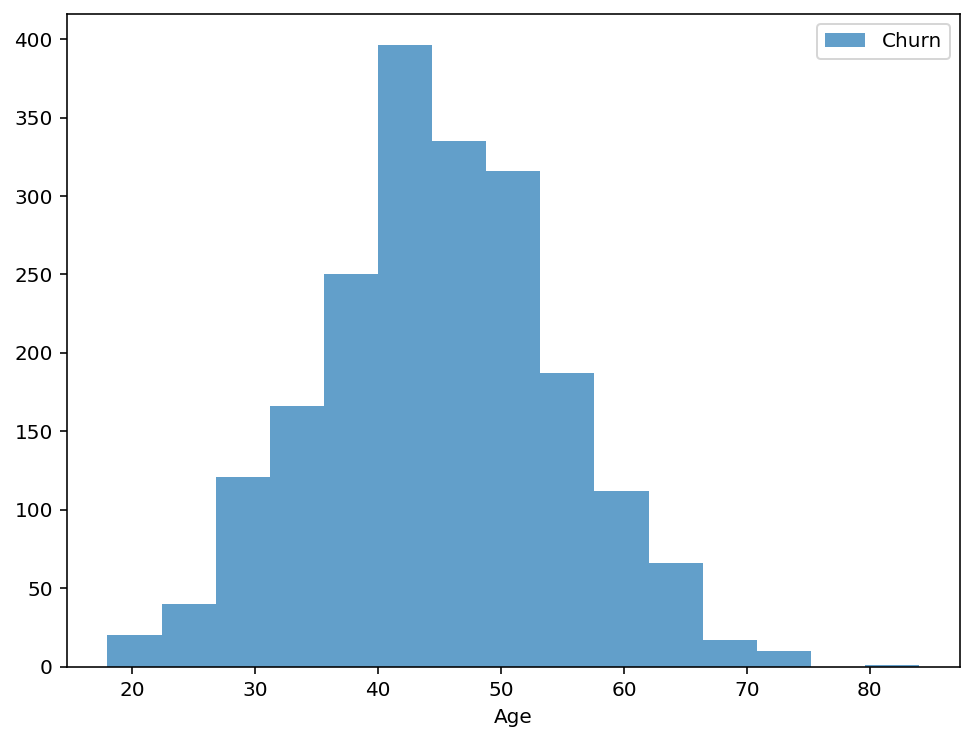

In [170]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

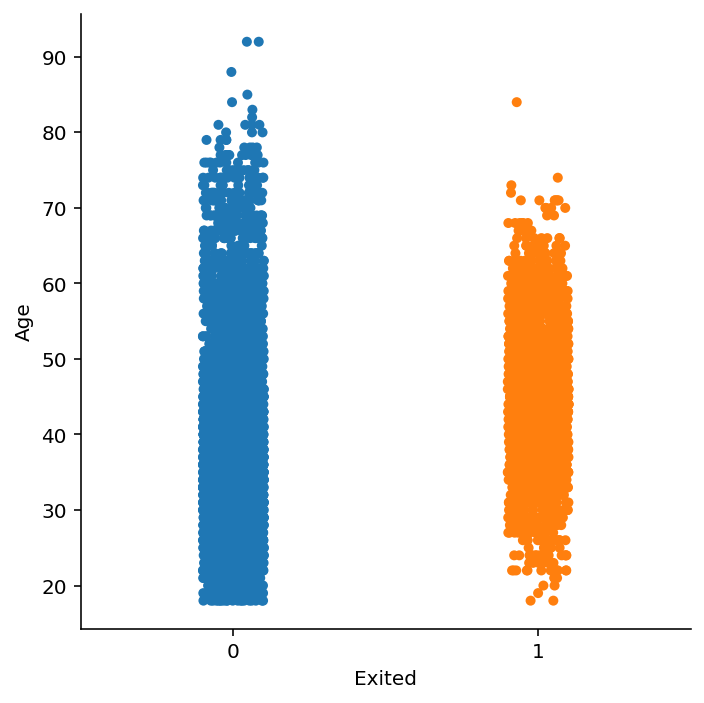

In [171]:
sns.catplot("Exited", "Age", data = df)

###Balance

In [172]:
not_churn["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
5%            0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
90%      148730.298000
95%      161592.595000
99%      183753.906200
max      221532.800000
Name: Balance, dtype: float64

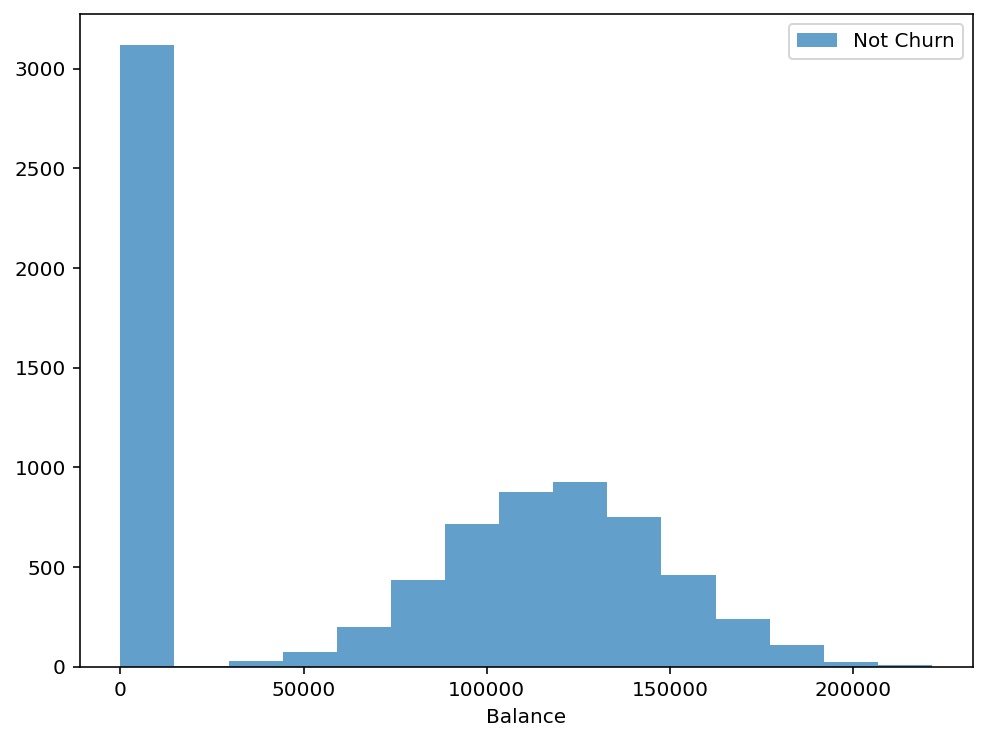

In [173]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(not_churn["Balance"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [174]:
churn["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
5%            0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
90%      152080.618000
95%      167698.240000
99%      197355.288400
max      250898.090000
Name: Balance, dtype: float64

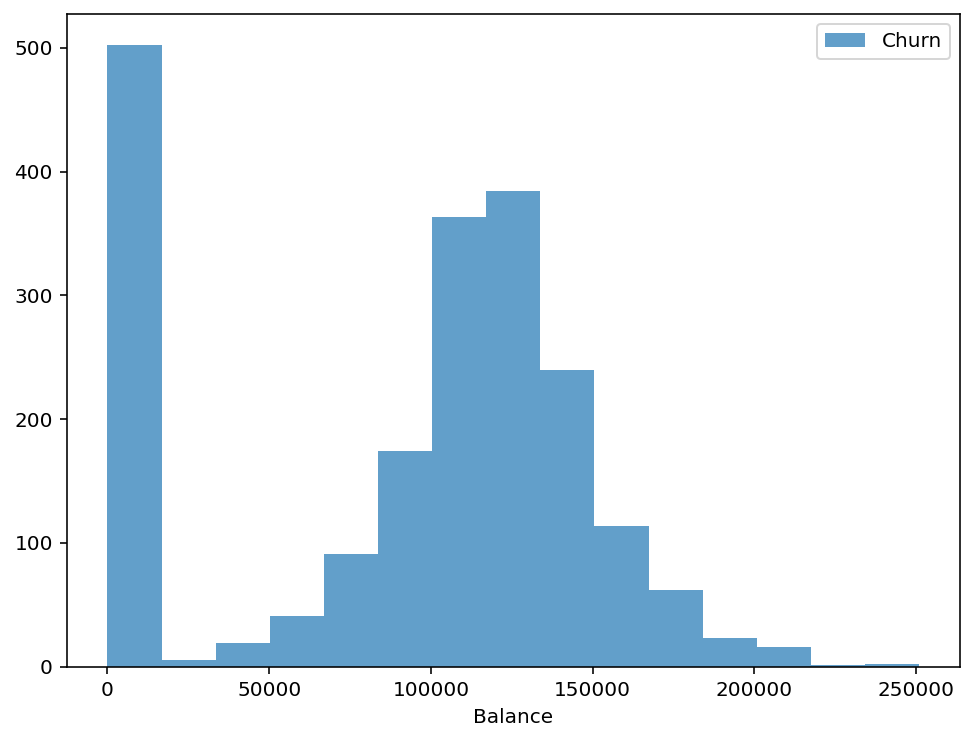

In [175]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(churn["Balance"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

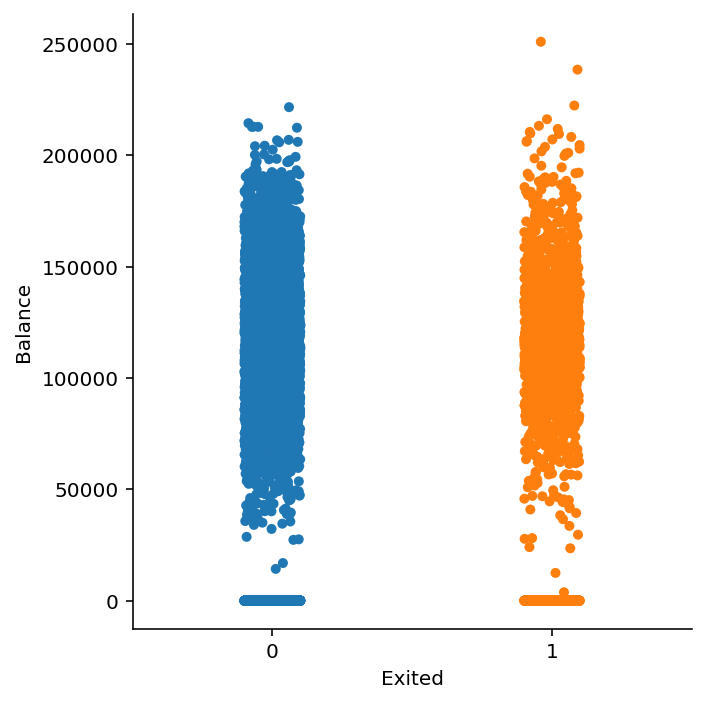

In [176]:
sns.catplot("Exited", "Balance", data = df)

###EstimatedSalary

In [177]:
not_churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
5%         9773.542000
25%       50783.490000
50%       99645.040000
75%      148609.955000
90%      179453.212000
95%      190107.557000
99%      198131.465200
max      199992.480000
Name: EstimatedSalary, dtype: float64

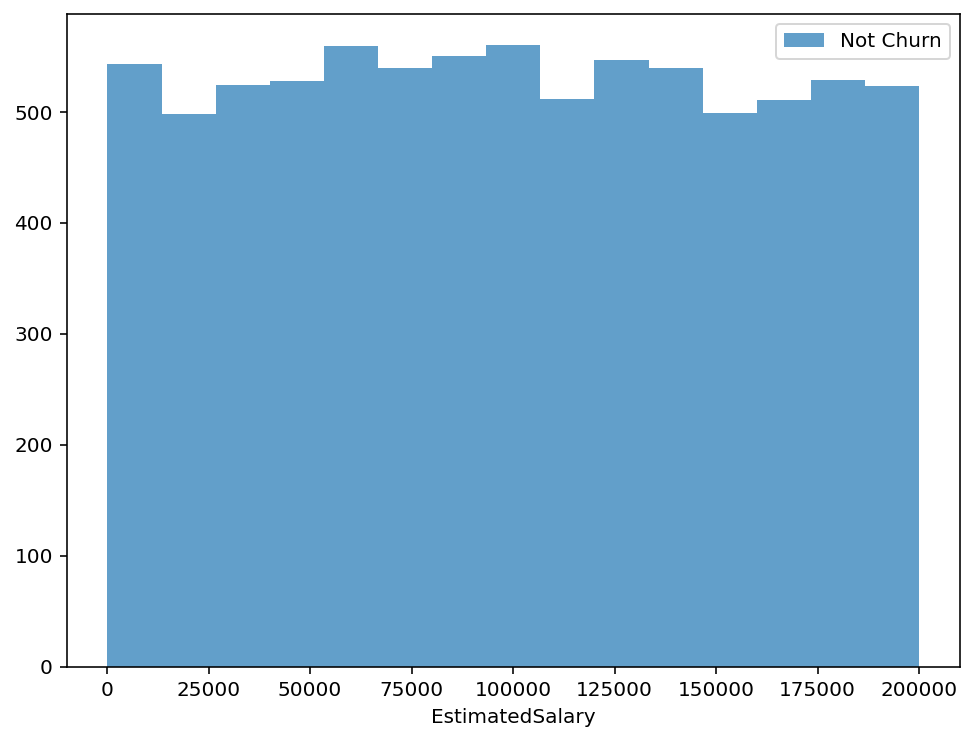

In [178]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [179]:
churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
5%        10030.760000
25%       51907.720000
50%      102460.840000
75%      152422.910000
90%      180169.390000
95%      190328.982000
99%      197717.297600
max      199808.100000
Name: EstimatedSalary, dtype: float64

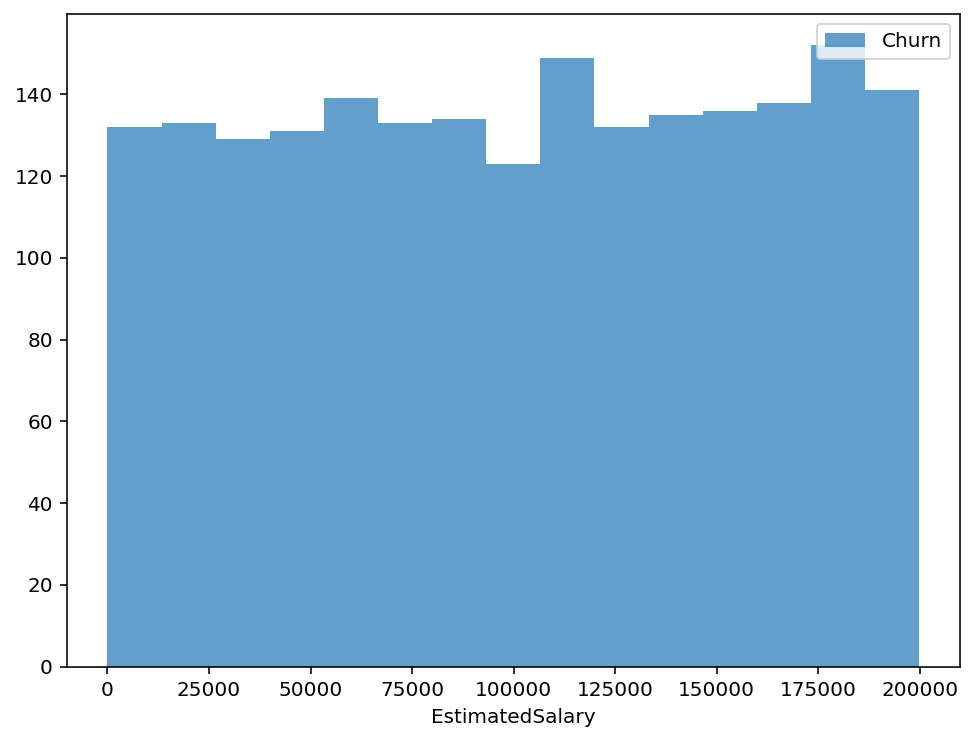

In [180]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(churn["EstimatedSalary"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

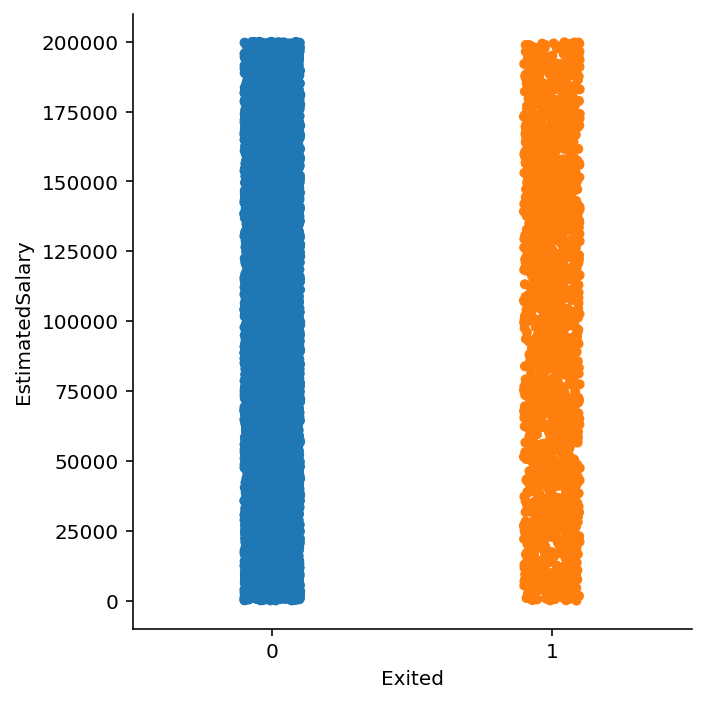

In [181]:
sns.catplot("Exited", "EstimatedSalary", data = df)

##Correaltion Matrix

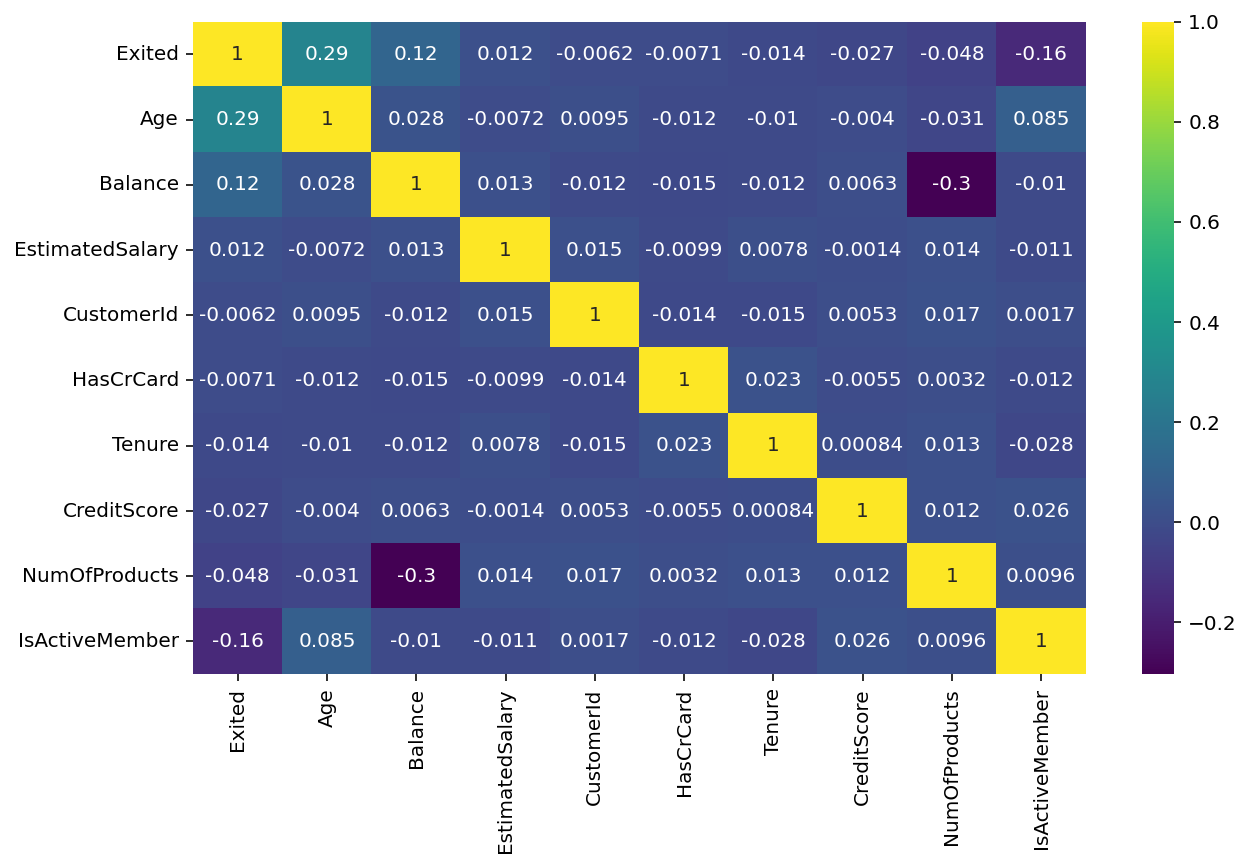

In [182]:
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

##Data Processing

###Missing Value

In [183]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64